# **Project Title**: Predicting Energy Efficiency of Commercial Buildings Using Seattle Energy Benchmarking Data
## **Author**: Afnan A
## **Date**: October 2024

---

## **Table of Contents**
1. [Introduction](#introduction)
2. [Problem Statement](#problem-statement)
3. [Imports](#imports)
4. [Data Description](#data-description)
5. [Data Wrangling](#data-wrangling) 
6. [Feature Engineering](#feature-engineering)
7. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis)
   

---

## **Introduction** <a name="introduction"></a>
Buildings, particularly commercial ones, represent a significant portion of energy consumption in urban areas. In the drive towards sustainability, improving energy efficiency in these buildings has become a priority. This project uses Seattle Building Energy Benchmarking data to predict energy efficiency and help building managers optimize energy consumption. By identifying key factors affecting energy use, actionable insights will be provided to enhance efficiency in various building types.

---

## **Problem Statement** <a name="problem-statement"></a>
The goal of this project is to develop a machine learning model that predicts the energy efficiency (measured as Energy Use Intensity - EUI) of commercial buildings based on factors like building characteristics, size, and operational usage. The key questions this project addresses are:

- Can we predict energy efficiency (EUI) using building characteristics and operational data?
- What are the most important factors affecting energy efficiency?
- How can machine learning models assist building managers in reducing energy consumption?

---

# **Imports:**

In [2]:
#Imports 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Load the data
df_2015 = pd.read_csv('Data/2015-building-energy-benchmarking.csv')
df_2016 = pd.read_csv('Data/2016-building-energy-benchmarking.csv')

df_2015.head(), df_2016.head(), df_2015.shape, df_2016.shape

(   OSEBuildingID  DataYear    BuildingType PrimaryPropertyType  \
 0              1      2015  NonResidential               Hotel   
 1              2      2015  NonResidential               Hotel   
 2              3      2015  NonResidential               Hotel   
 3              5      2015  NonResidential               Hotel   
 4              8      2015  NonResidential               Hotel   
 
             PropertyName TaxParcelIdentificationNumber  \
 0   MAYFLOWER PARK HOTEL                     659000030   
 1        PARAMOUNT HOTEL                     659000220   
 2           WESTIN HOTEL                     659000475   
 3              HOTEL MAX                     659000640   
 4  WARWICK SEATTLE HOTEL                     659000970   
 
                                             Location  CouncilDistrictCode  \
 0  {'latitude': '47.61219025', 'longitude': '-122...                    7   
 1  {'latitude': '47.61310583', 'longitude': '-122...                    7   
 2  {'

## **Data Wrangling:**

| **Feature Name**                | **Description**                                                                                     |
|----------------------------------|-----------------------------------------------------------------------------------------------------|
| **OSEBuildingID**                | A unique identifier assigned to each building for tracking purposes.                                 |
| **DataYear**                     | The year for which the energy usage data was recorded.                                               |
| **BuildingType**                 | The primary use type of the building, such as "Office", "Retail", "Residential", etc.                |
| **PrimaryPropertyType**          | A detailed description of the building type, for example, "Hotel", "Hospital", or "Multifamily Housing". |
| **PropertyName**                 | The name of the building (if available).                                                            |
| **Address**                      | The building’s street address.                                                                      |
| **City**                         | The city in which the building is located, though this dataset focuses on Seattle.                   |
| **State**                        | The state where the building is located.                                                            |
| **ZipCode**                      | The postal code of the building location.                                                           |
| **TaxParcelIdentificationNumber**| A unique identifier assigned for tax purposes.                                                      |
| **CouncilDistrictCode**          | The district in which the building is located.                                                      |
| **Neighborhood**                 | The neighborhood where the building is situated.                                                    |
| **Latitude**                     | Geographic latitude of the building.                                                                |
| **Longitude**                    | Geographic longitude of the building.                                                               |
| **YearBuilt**                    | The year the building was originally constructed.                                                   |
| **NumberofBuildings**            | The number of buildings associated with the property (e.g., campuses or complexes).                  |
| **NumberofFloors**               | The total number of floors in the building.                                                         |
| **PropertyGFATotal**             | The total gross floor area (GFA) of the building in square feet.                                    |
| **PropertyGFAParking**           | The total gross floor area dedicated to parking.                                                    |
| **PropertyGFABuilding(s)**       | The total gross floor area excluding parking areas.                                                 |
| **LargestPropertyUseType**       | The largest type of use by area within the building (e.g., "Office", "Retail").                     |
| **LargestPropertyUseTypeGFA**    | The gross floor area dedicated to the largest property use type.                                    |
| **SecondLargestPropertyUseType** | The second-largest use type within the building.                                                    |
| **SecondLargestPropertyUseTypeGFA**| The gross floor area dedicated to the second-largest property use type.                             |
| **ThirdLargestPropertyUseType**  | The third-largest use type within the building.                                                     |
| **ThirdLargestPropertyUseTypeGFA**| The gross floor area dedicated to the third-largest property use type.                              |
| **YearsENERGYSTARCertified**     | The years in which the building received ENERGY STAR certification.                                 |
| **ENERGYSTARScore**              | A score between 1-100 indicating the building’s energy performance compared to similar buildings.    |
| **SiteEUI(kBtu/sf)**             | Energy Use Intensity (EUI) measured in thousands of BTUs per square foot for the building, reflecting site energy consumption. |
| **SiteEUIWN(kBtu/sf)**           | Weather-normalized site EUI, adjusting for local climate variations.                                |
| **SourceEUI(kBtu/sf)**           | Similar to Site EUI but reflects energy use from all energy sources including off-site sources.      |
| **SourceEUIWN(kBtu/sf)**         | Weather-normalized source EUI.                                                                      |
| **SiteEnergyUse(kBtu)**          | The total site energy usage in thousands of BTUs.                                                   |
| **SiteEnergyUseWN(kBtu)**        | Weather-normalized site energy usage.                                                               |
| **SteamUse(kBtu)**               | The total energy consumption from steam in thousands of BTUs.                                       |
| **Electricity(kWh)**             | Total electricity consumption in kilowatt-hours.                                                    |
| **Electricity(kBtu)**            | Total electricity consumption converted to thousands of BTUs.                                       |
| **NaturalGas(therms)**           | Total natural gas consumption in therms.                                                            |
| **NaturalGas(kBtu)**             | Total natural gas consumption converted to thousands of BTUs.                                       |
| **DefaultData**                  | A flag indicating if default data values were used (Y/N).                                           |
| **Comment**                      | Additional notes or comments about the data.                                                        |
| **ComplianceStatus**             | Whether the building is compliant with the Seattle Energy Benchmarking requirements.                |
| **Outlier**                      | Indicates if the data is considered an outlier.                                                     |
| **TotalGHGEmissions**            | The total greenhouse gas emissions from the building’s energy use, measured in metric tons of CO2 equivalent. |
| **GHGEmissionsIntensity**        | Greenhouse gas emissions intensity measured as emissions per square foot of building area (metric tons CO2e/sq ft). |


## **Initial Dataset Details**

The datasets for 2015 and 2016 have been successfully loaded. Here are some initial details:

### 2015 Dataset
* Number of entries: **3340**
* Number of features: **47**

### 2016 Dataset
* Number of entries: **3376**
* Number of features: **46**

Each dataset contains a variety of building characteristics, energy usage metrics, and environmental data.

## **Next Steps**

1. **Merge Datasets:** If relevant, we can combine the 2015 and 2016 data into a single dataset for a more comprehensive analysis.
2. **Data Inspection:** I will check the column names, data types, and look for missing values in both datasets.
3. **Preprocessing:** This includes handling missing values, addressing potential outliers, and standardizing or normalizing data where needed.

In [4]:
# Checking column names, data types, and missing values in both datasets
info_2015 = df_2015.info()
info_2016 = df_2016.info()

missing_values_2015 = df_2015.isnull().sum().sort_values(ascending=False)
missing_values_2016 = df_2016.isnull().sum().sort_values(ascending=False)

missing_values_2015, missing_values_2016

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

(Comment                                                          3327
 Outlier                                                          3256
 YearsENERGYSTARCertified                                         3230
 City Council Districts                                           3127
 2010 Census Tracts                                               3116
 ThirdLargestPropertyUseTypeGFA                                   2780
 ThirdLargestPropertyUseType                                      2780
 SecondLargestPropertyUseTypeGFA                                  1781
 SecondLargestPropertyUseType                                     1781
 ENERGYSTARScore                                                   780
 LargestPropertyUseTypeGFA                                         136
 LargestPropertyUseType                                            136
 ListOfAllPropertyUseTypes                                         127
 GHGEmissionsIntensity(kgCO2e/ft2)                                  10
 Natur

## **Data Inspection Summary**

Both datasets are quite comprehensive, with each having a few challenges regarding missing values:

### 2015 Dataset
* The dataset contains some columns with significant amounts of missing data, such as **SecondLargestPropertyUseType** and **ThirdLargestPropertyUseType**.
* The columns **Comment** and **Outlier** are mostly null and might not be useful for analysis.

### 2016 Dataset
* Similar to the 2015 data, there are significant missing values in **SecondLargestPropertyUseType**, **ThirdLargestPropertyUseType**, and **YearsENERGYSTARCertified**.
* The **ENERGYSTARScore** is missing in a considerable number of entries, which may be crucial as it could correlate strongly with energy efficiency.

## **Data Preprocessing Plan**

### Handling Missing Values
* Columns with a very high percentage of missing values can be considered for removal if they are not critical to the analysis.
* For columns like **YearBuilt**, **NumberofFloors**, and **ENERGYSTARScore**, we can impute missing values using median or mode, depending on the distribution.

### Outliers
* Identify and assess the impact of outliers, especially in the energy consumption and building attributes.

### Feature Engineering
* Derive new features such as building age and log transformations of skewed features like **PropertyGFATotal**.

### Data Integration
* Merge the 2015 and 2016 datasets if needed to enhance the dataset size and diversity, considering the consistency of columns between the two years.

In [5]:
# Checking for consistency in column names between the two datasets
columns_2015 = set(df_2015.columns)
columns_2016 = set(df_2016.columns)

# Common and unique columns
common_columns = columns_2015.intersection(columns_2016)
unique_columns_2015 = columns_2015.difference(columns_2016)
unique_columns_2016 = columns_2016.difference(columns_2015)

common_columns, unique_columns_2015, unique_columns_2016

({'BuildingType',
  'ComplianceStatus',
  'CouncilDistrictCode',
  'DataYear',
  'DefaultData',
  'ENERGYSTARScore',
  'Electricity(kBtu)',
  'Electricity(kWh)',
  'LargestPropertyUseType',
  'LargestPropertyUseTypeGFA',
  'ListOfAllPropertyUseTypes',
  'NaturalGas(kBtu)',
  'NaturalGas(therms)',
  'Neighborhood',
  'NumberofBuildings',
  'NumberofFloors',
  'OSEBuildingID',
  'Outlier',
  'PrimaryPropertyType',
  'PropertyGFABuilding(s)',
  'PropertyGFAParking',
  'PropertyGFATotal',
  'PropertyName',
  'SecondLargestPropertyUseType',
  'SecondLargestPropertyUseTypeGFA',
  'SiteEUI(kBtu/sf)',
  'SiteEUIWN(kBtu/sf)',
  'SiteEnergyUse(kBtu)',
  'SiteEnergyUseWN(kBtu)',
  'SourceEUI(kBtu/sf)',
  'SourceEUIWN(kBtu/sf)',
  'SteamUse(kBtu)',
  'TaxParcelIdentificationNumber',
  'ThirdLargestPropertyUseType',
  'ThirdLargestPropertyUseTypeGFA',
  'YearBuilt',
  'YearsENERGYSTARCertified'},
 {'2010 Census Tracts',
  'City Council Districts',
  'Comment',
  'GHGEmissions(MetricTonsCO2e)',
  'G

## **Column Analysis**

### **Common Columns**
Both datasets share 39 columns that include various building characteristics, energy usage, and environmental data, ensuring a smooth merge.

### Unique Columns in 2015
Some columns like **Location**, **Comment**, and several related to specific Seattle data zones are unique to 2015.

### Unique Columns in 2016
Columns such as **Address**, **City**, **State**, and **ZipCode** are specific to 2016, offering more detailed location information.

### Data Merging Strategy
Given the significant overlap in common columns, we can safely merge the datasets on these common columns. Unique columns from each year can be added to the combined dataset where applicable.

In [6]:
# Merging the datasets
# Aligning the datasets by renaming and combining specific columns for consistency
df_2016_renamed = df_2016.rename(columns={
    'Address': 'Location',  # Assuming Location and Address are similar enough for our purposes
    'Comments': 'Comment'   # Standardizing the naming for comments
})

# Combining the datasets
df_combined = pd.concat([df_2015, df_2016_renamed], ignore_index=True)

# Handle missing values for newly combined columns that might not align perfectly
for column in unique_columns_2015.union(unique_columns_2016):
    if column not in df_combined.columns:
        df_combined[column] = None  # Adding placeholders for any missing columns

# Checking the shape and presence of null values after merging
df_combined.shape, df_combined.isnull().sum().sort_values(ascending=False)

((6716, 56),
 Comments                                                         6716
 Address                                                          6716
 Comment                                                          6703
 Outlier                                                          6600
 City Council Districts                                           6503
 2010 Census Tracts                                               6492
 YearsENERGYSTARCertified                                         6487
 ThirdLargestPropertyUseTypeGFA                                   5560
 ThirdLargestPropertyUseType                                      5560
 SecondLargestPropertyUseType                                     3478
 SecondLargestPropertyUseTypeGFA                                  3478
 GHGEmissionsIntensity(kgCO2e/ft2)                                3386
 OtherFuelUse(kBtu)                                               3386
 GHGEmissions(MetricTonsCO2e)                                   

## **Data Merging Summary**

The datasets have been successfully merged into a single dataset with a total of **6716 entries**. Here's a breakdown of the next steps based on the merged data:

### Columns with High Missing Values
* **Comment, Outlier, and YearsENERGYSTARCertified:** These columns have a significant amount of missing data, which may render them less useful for predictive modeling.
* **SecondLargestPropertyUseType and ThirdLargestPropertyUseType:** Also have considerable missing data, but might provide valuable insights if filled appropriately.

### Addressing Missing Values
* For critical numerical columns with missing values, such as **ENERGYSTARScore, NaturalGas(kBtu), and Electricity(kBtu)**, we can try imputation using median values due to their skewed nature, which is common in energy data.

## Next Steps for Data Cleaning

* **Remove columns** with overwhelmingly high missing values that won't provide meaningful insights or could bias the model.
* **Impute missing values** for important columns like **ENERGYSTARScore**.
* **Address outliers:** Briefly inspect the distribution of key numeric variables and decide on a strategy to handle extreme values, which can affect model accuracy.
* **Feature engineering:** Create new features such as building age and transformations to handle skewed distributions.

In [7]:
# Removing columns with overwhelmingly high missing values
columns_to_remove = ['Comment', 'Outlier', 'YearsENERGYSTARCertified', 'Address', 'Comments', 
                     'City Council Districts', '2010 Census Tracts', 'SPD Beats', 
                     'Seattle Police Department Micro Community Policing Plan Areas', 
                     'Zip Codes', 'ZipCode', 'City', 'State', 'Latitude', 'Longitude']

df_cleaned = df_combined.drop(columns=columns_to_remove, errors='ignore')

# Impute missing values for ENERGYSTARScore using median
df_cleaned['ENERGYSTARScore'].fillna(df_cleaned['ENERGYSTARScore'].median(), inplace=True)

# Check the number of buildings and floors - if they are essential, we can impute with mode
df_cleaned['NumberofBuildings'].fillna(df_cleaned['NumberofBuildings'].mode()[0], inplace=True)
df_cleaned['NumberofFloors'].fillna(df_cleaned['NumberofFloors'].mode()[0], inplace=True)

# Verify the changes and check for remaining missing values
df_cleaned.isnull().sum().sort_values(ascending=False)

ThirdLargestPropertyUseType          5560
ThirdLargestPropertyUseTypeGFA       5560
SecondLargestPropertyUseType         3478
SecondLargestPropertyUseTypeGFA      3478
GHGEmissionsIntensity(kgCO2e/ft2)    3386
GHGEmissions(MetricTonsCO2e)         3386
OtherFuelUse(kBtu)                   3386
TotalGHGEmissions                    3349
GHGEmissionsIntensity                3349
LargestPropertyUseType                156
LargestPropertyUseTypeGFA             156
ListOfAllPropertyUseTypes             136
SourceEUI(kBtu/sf)                     19
NaturalGas(therms)                     19
SourceEUIWN(kBtu/sf)                   19
Electricity(kWh)                       19
Electricity(kBtu)                      19
SteamUse(kBtu)                         19
NaturalGas(kBtu)                       19
SiteEUI(kBtu/sf)                       17
SiteEUIWN(kBtu/sf)                     16
SiteEnergyUseWN(kBtu)                  16
SiteEnergyUse(kBtu)                    15
TaxParcelIdentificationNumber     

## **Progress on Data Cleaning**

### Completed:
* Removed columns with a high proportion of missing values that might not be essential for predictive modeling.
* Imputed missing values for **ENERGYSTARScore using the median** and for **NumberofBuildings and NumberofFloors** using the mode.

### Remaining Issues
* **OtherFuelUse(kBtu)** and properties related to the size of secondary and tertiary property use types still have many missing values. We need to decide whether to fill these with some default value, impute, or drop them based on their predictive relevance.
* Energy and emissions data have a small number of missing values which can be imputed to maintain dataset integrity.

## Next Steps for Final Data Preparation

### Further Imputation
* For columns like **LargestPropertyUseTypeGFA and Electricity(kWh)**, we will use **median imputation**.
* For categorical columns with missing data, consider using the most frequent category or a placeholder like 'Unknown'.

### Feature Engineering
* Create a feature for **BuildingAge.**
* Consider transforming skewed numeric features such as **PropertyGFATotal.**

### Normalization/Standardization
* Depending on the chosen modeling technique, normalize or standardize numeric features to improve model performance.

## **Feature Engineering**

In [8]:
# Further imputations for numerical columns
numerical_cols_to_impute = ['LargestPropertyUseTypeGFA', 'Electricity(kWh)', 'Electricity(kBtu)',
                            'NaturalGas(therms)', 'NaturalGas(kBtu)', 'GHGEmissions(MetricTonsCO2e)',
                            'GHGEmissionsIntensity(kgCO2e/ft2)', 'SiteEUI(kBtu/sf)', 'SiteEnergyUseWN(kBtu)',
                            'SiteEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)', 'SteamUse(kBtu)',
                            'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'OtherFuelUse(kBtu)']

for col in numerical_cols_to_impute:
    df_cleaned[col].fillna(df_cleaned[col].median(), inplace=True)

# Imputation for categorical columns
categorical_cols_to_impute = ['SecondLargestPropertyUseType', 'ThirdLargestPropertyUseType',
                              'LargestPropertyUseType', 'ListOfAllPropertyUseTypes']

for col in categorical_cols_to_impute:
    df_cleaned[col].fillna('Unknown', inplace=True)

# Feature engineering: Create a 'BuildingAge' feature
current_year = 2024
df_cleaned['BuildingAge'] = current_year - df_cleaned['YearBuilt']

# Log transformation of skewed features
df_cleaned['LogPropertyGFATotal'] = np.log1p(df_cleaned['PropertyGFATotal'])

# Verify the dataset after imputations and transformations
df_cleaned.isnull().sum().sort_values(ascending=False), df_cleaned.head()


(ThirdLargestPropertyUseTypeGFA       5560
 SecondLargestPropertyUseTypeGFA      3478
 GHGEmissionsIntensity                3349
 TotalGHGEmissions                    3349
 TaxParcelIdentificationNumber           2
 DefaultData                             1
 Electricity(kBtu)                       0
 SourceEUI(kBtu/sf)                      0
 SourceEUIWN(kBtu/sf)                    0
 SiteEnergyUse(kBtu)                     0
 SiteEnergyUseWN(kBtu)                   0
 SteamUse(kBtu)                          0
 Electricity(kWh)                        0
 NaturalGas(kBtu)                        0
 NaturalGas(therms)                      0
 SiteEUI(kBtu/sf)                        0
 OtherFuelUse(kBtu)                      0
 GHGEmissions(MetricTonsCO2e)            0
 GHGEmissionsIntensity(kgCO2e/ft2)       0
 ComplianceStatus                        0
 BuildingAge                             0
 SiteEUIWN(kBtu/sf)                      0
 OSEBuildingID                           0
 ENERGYSTAR

## Data Cleaning and Feature Engineering Complete

We've successfully cleaned the data and engineered new features. Here’s a summary of what has been done:

* **Removed Unnecessary Columns:** We dropped columns with extensive missing values and those not relevant to our analysis.
* **Imputed Missing Values:** Numerical columns have been imputed with the median to maintain data integrity, and categorical columns were filled with 'Unknown' where applicable.
* **Feature Engineering:**
  * **BuildingAge:** Created to provide insight into the effect of building age on energy efficiency.
  * **LogPropertyGFATotal:** Log transformation applied to the PropertyGFATotal to normalize its distribution and potentially enhance model performance.

### Final Dataset Overview
* Entries: 6716
* Features used: 41 (after cleaning and adding new features)

The dataset is now ready for exploratory data analysis, feature selection, and machine learning modeling.

Next Steps:
Exploratory Data Analysis (EDA): Visualize the distributions, relationships, and potential correlations in the dataset.

## **EDA Focus Areas**

### **Distribution of Key Numeric Features**
#### - Inspect the distribution of EUI and other continuous variables like BuildingAge, PropertyGFATotal, and ENERGYSTARScore.

### **Categorical Data Analysis**
#### - Examine how categorical variables like BuildingType and PrimaryPropertyType relate to EUI.

### **Correlation Analysis**
#### - Analyze the correlation between numerical features to understand relationships and potential multicollinearity.

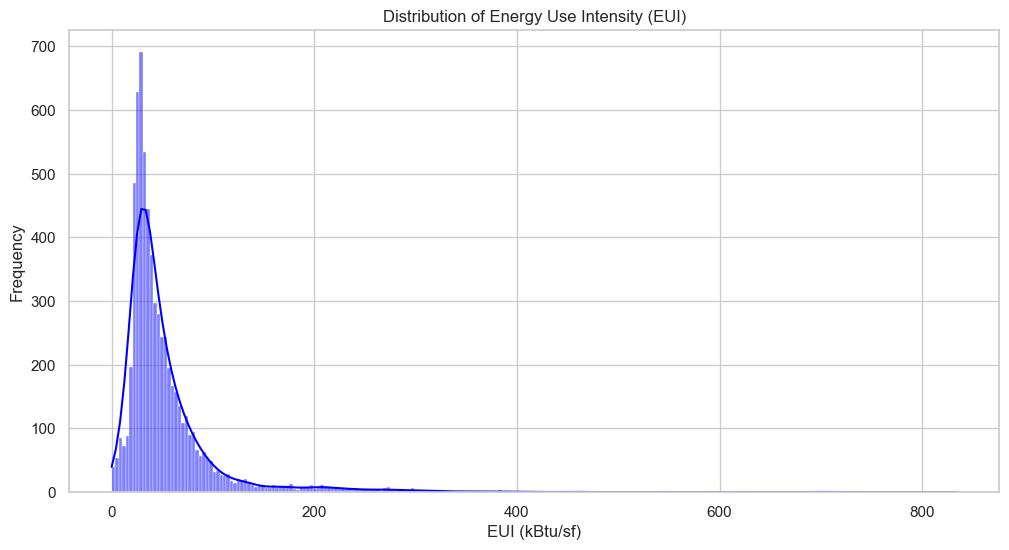

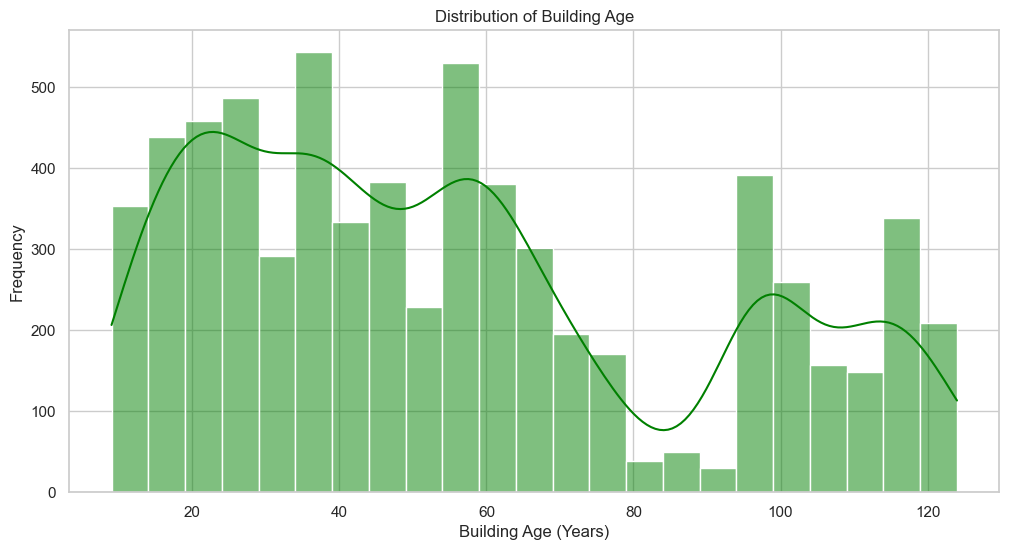

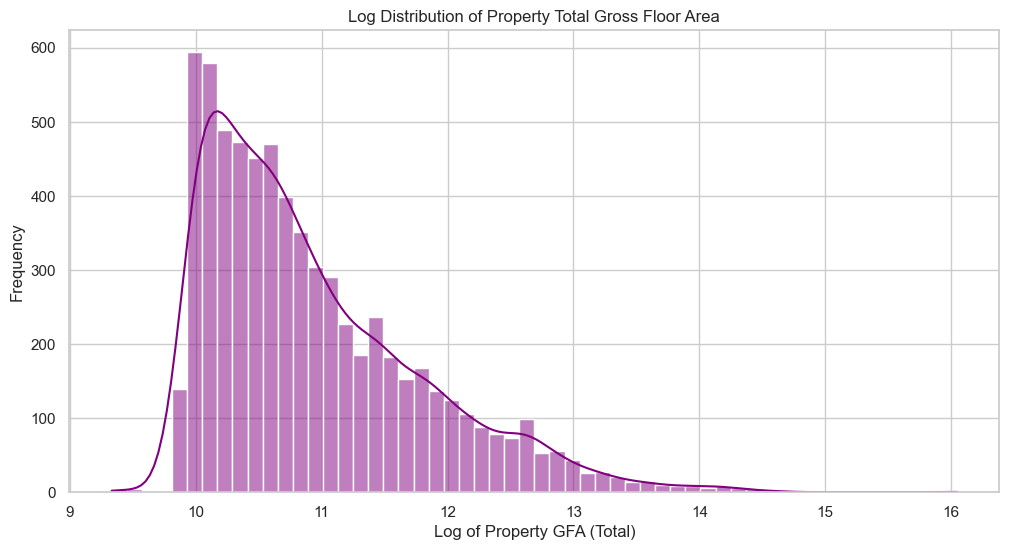

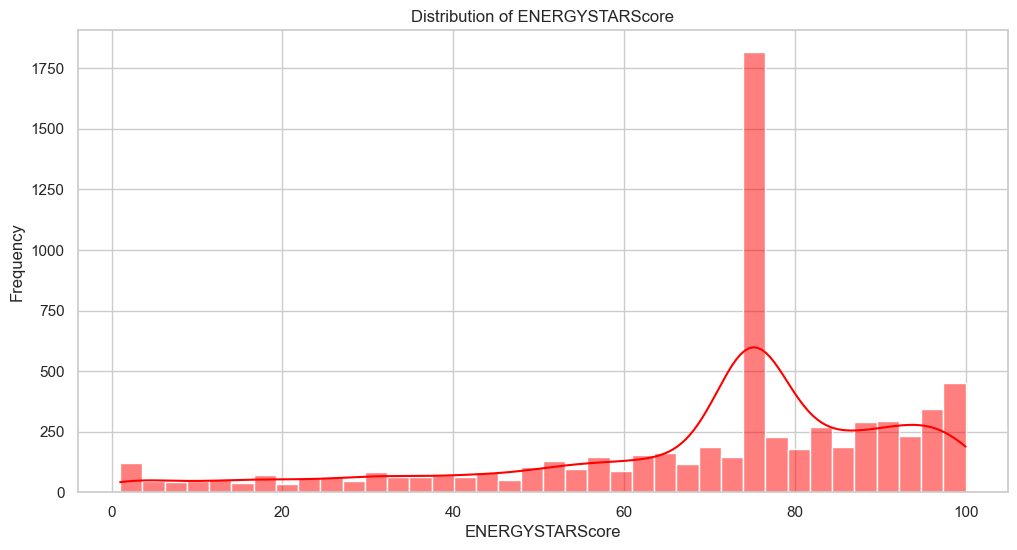

In [9]:
# Setting up the visualization environment
sns.set(style="whitegrid")

# 1. Distribution of Energy Use Intensity (EUI)
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['SiteEUI(kBtu/sf)'], kde=True, color='blue')
plt.title('Distribution of Energy Use Intensity (EUI)')
plt.xlabel('EUI (kBtu/sf)')
plt.ylabel('Frequency')
plt.show()

# 2. Distribution of Building Age
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['BuildingAge'], kde=True, color='green')
plt.title('Distribution of Building Age')
plt.xlabel('Building Age (Years)')
plt.ylabel('Frequency')
plt.show()

# 3. Distribution of Log of Property Total Gross Floor Area
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['LogPropertyGFATotal'], kde=True, color='purple')
plt.title('Log Distribution of Property Total Gross Floor Area')
plt.xlabel('Log of Property GFA (Total)')
plt.ylabel('Frequency')
plt.show()

# 4. Distribution of ENERGYSTARScore
plt.figure(figsize=(12, 6))
sns.histplot(df_cleaned['ENERGYSTARScore'], kde=True, color='red')
plt.title('Distribution of ENERGYSTARScore')
plt.xlabel('ENERGYSTARScore')
plt.ylabel('Frequency')
plt.show()


## **EDA Visualizations Summary**

Here are the insights from the histograms of key variables:

### **Energy Use Intensity (EUI)**
* The distribution shows a right-skewed pattern, suggesting that most buildings have lower EUI, with a few buildings having significantly higher values. This skewness indicates potential outliers or extreme cases of energy consumption.

### **Building Age**
* The age of buildings also exhibits a right-skewed distribution, indicating a larger number of newer buildings compared to older ones. This could influence energy efficiency, as newer buildings may have better energy standards.

### **Log of Property Total Gross Floor Area**
* The log transformation of the Gross Floor Area has normalized the distribution, which is now more bell-shaped. This transformation can help in reducing the influence of extreme values in the data.

### **ENERGYSTARScore**
* The ENERGYSTARScore is relatively uniformly distributed across a wide range of scores. However, there are spikes around specific scores (e.g., 100), indicating that a number of buildings achieve high energy performance ratings.

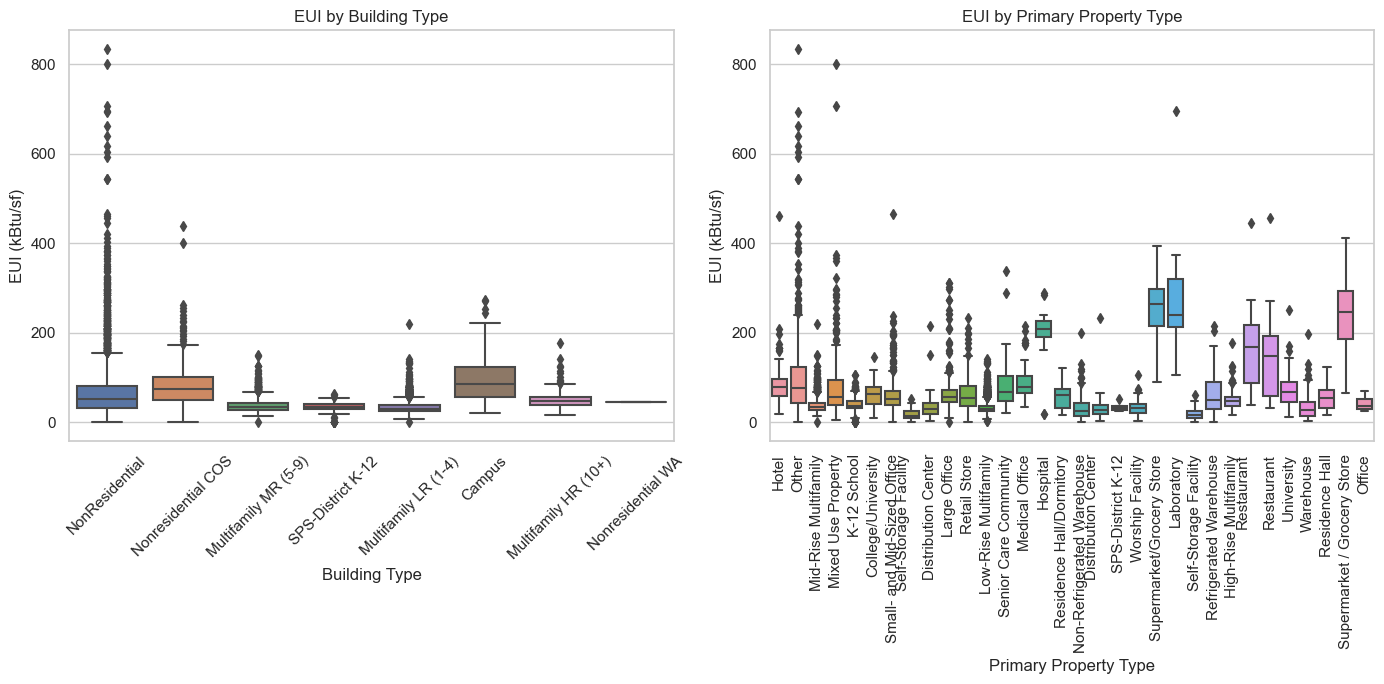

In [10]:
# Analyzing the relationship between categorical variables and EUI

# Setting up plots for Building Type and Primary Property Type with respect to EUI
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
sns.boxplot(x='BuildingType', y='SiteEUI(kBtu/sf)', data=df_cleaned)
plt.title('EUI by Building Type')
plt.xticks(rotation=45)
plt.xlabel('Building Type')
plt.ylabel('EUI (kBtu/sf)')

plt.subplot(1, 2, 2)
sns.boxplot(x='PrimaryPropertyType', y='SiteEUI(kBtu/sf)', data=df_cleaned)
plt.title('EUI by Primary Property Type')
plt.xticks(rotation=90)
plt.xlabel('Primary Property Type')
plt.ylabel('EUI (kBtu/sf)')

plt.tight_layout()
plt.show()


## **Categorical Variables Analysis**

Here's a summary of the insights from the box plots:

### EUI by Building Type
* The Energy Use Intensity varies significantly across different building types. Notably, NonResidential and SPS-District K-12 show a wider range of EUI values, indicating variability in how these building types consume energy.
* Campus and Nonresidential COS have relatively tighter distributions, suggesting more uniform energy usage within these categories.

### EUI by Primary Property Type
* There is a considerable variation in EUI across different property types. Properties like Hospital, Hotel, and Supermarket/Grocery Store exhibit higher median EUI, which is consistent with the high energy demands typically associated with these facilities.
* Conversely, types like Office, Warehouse, and Mixed Use Property show lower EUI medians but with varied distributions, pointing to potential efficiencies or inefficiencies within similar property types.

**Interpretation**
* The variability in EUI across building and property types underscores the importance of considering specific use cases and building characteristics when analyzing energy efficiency. This variability is likely influenced by factors such as building operations, maintenance practices, and occupancy patterns.

**Further Steps**
* **Correlation Analysis:** We can proceed to analyze the numerical correlations to understand how different numerical features relate to each other and to EUI.
* **Regression Analysis:** Prepare the data for regression analysis to predict EUI based on these characteristics.

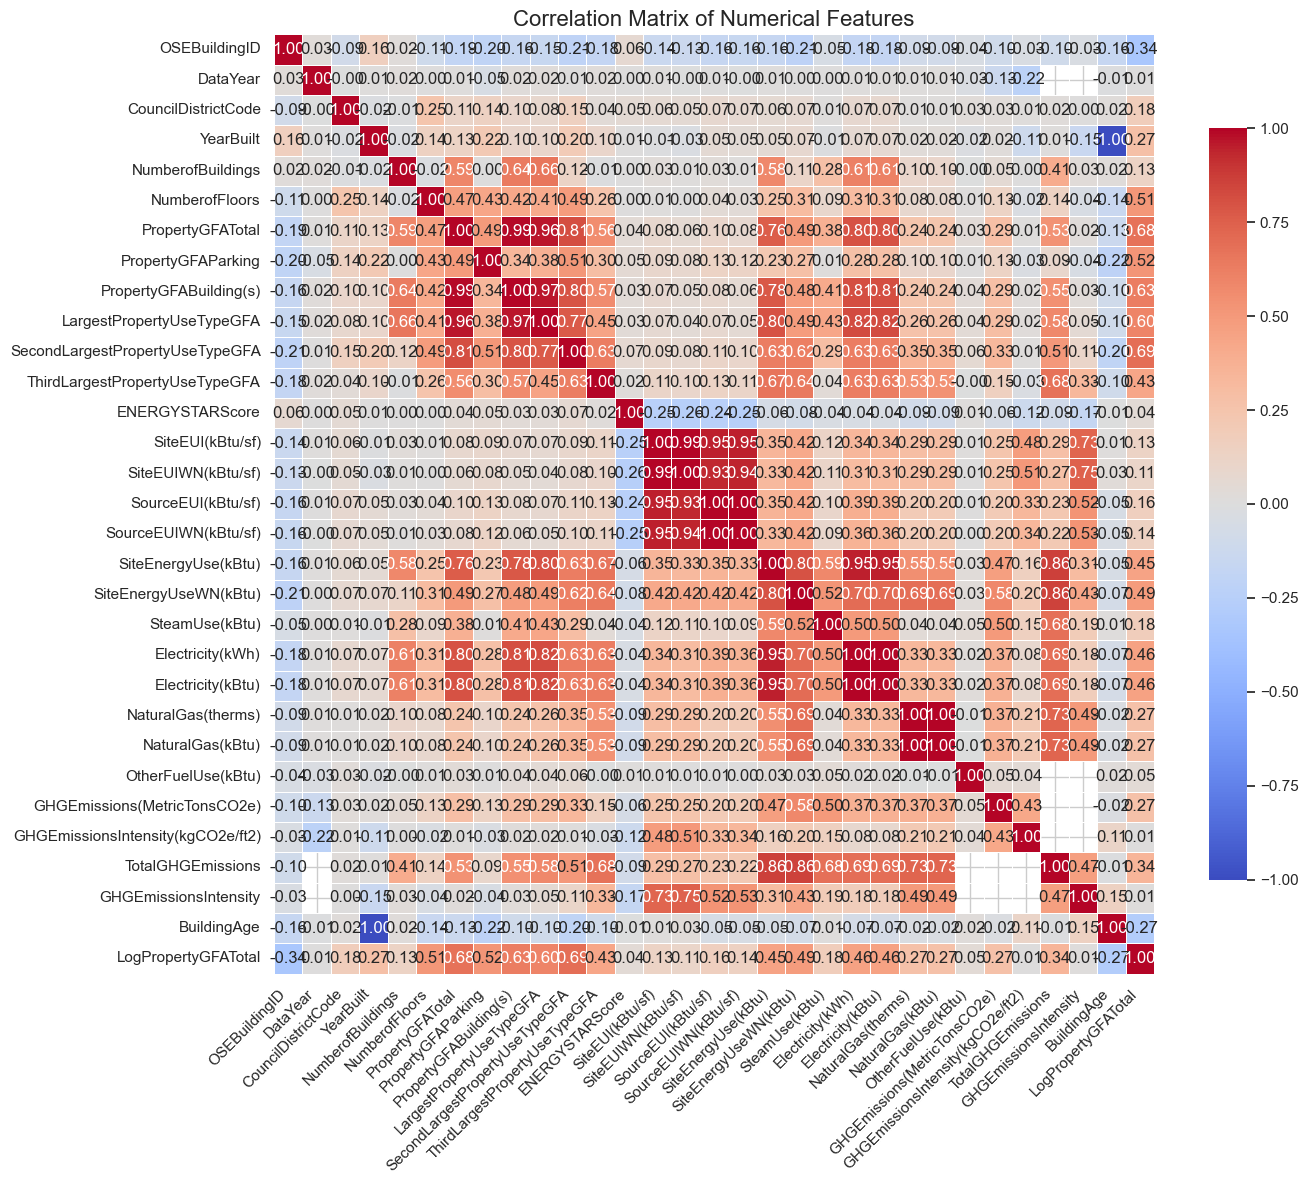

SiteEUI(kBtu/sf)                     1.000000
SiteEUIWN(kBtu/sf)                   0.994484
SourceEUI(kBtu/sf)                   0.947163
SourceEUIWN(kBtu/sf)                 0.946058
GHGEmissionsIntensity                0.730901
GHGEmissionsIntensity(kgCO2e/ft2)    0.482930
SiteEnergyUseWN(kBtu)                0.421767
SiteEnergyUse(kBtu)                  0.350720
Electricity(kBtu)                    0.337386
Electricity(kWh)                     0.337383
NaturalGas(kBtu)                     0.289391
NaturalGas(therms)                   0.289391
TotalGHGEmissions                    0.286636
GHGEmissions(MetricTonsCO2e)         0.245164
LogPropertyGFATotal                  0.127177
SteamUse(kBtu)                       0.120420
ThirdLargestPropertyUseTypeGFA       0.112540
SecondLargestPropertyUseTypeGFA      0.092925
PropertyGFAParking                   0.091277
PropertyGFATotal                     0.083515
PropertyGFABuilding(s)               0.072503
LargestPropertyUseTypeGFA         

In [11]:
# Calculating the correlation matrix for numerical features
correlation_matrix = df_cleaned.select_dtypes(include=['float64', 'int64']).corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(14, 12))  # Adjust the figure size for better visibility
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numerical Features', fontsize=16)
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.yticks(rotation=0)  # Keep y labels horizontal
plt.tight_layout()  # Ensure everything fits without overlap
plt.show()

# Extracting and displaying the correlation of features with 'SiteEUI(kBtu/sf)'
correlation_with_eui = correlation_matrix['SiteEUI(kBtu/sf)'].sort_values(ascending=False)
print(correlation_with_eui)

## **Correlation Analysis Summary**

The correlation matrix and the detailed correlation with the Site Energy Use Intensity (EUI) reveal some key insights:

### Strong Correlations
* **SiteEUIWN(kBtu/sf)** and **SourceEUI(kBtu/sf)** show very high correlations with EUI, suggesting they share similar underlying information about energy use.
* **GHGEmissionsIntensity** also shows a strong positive correlation, indicating that higher emissions intensity often correlates with higher energy use.

### Energy Consumption and Emissions
* **Electricity (kWh/kBtu)** and **Natural Gas (therms/kBtu)** are moderately correlated with EUI, emphasizing the impact of these energy sources on overall energy intensity.

### Building Characteristics
* **LogPropertyGFATotal** and **PropertyGFATotal** have positive correlations with EUI, although not very strong, indicating that larger buildings tend to have higher EUI.
* **ENERGYSTARScore** has a moderate negative correlation, which aligns with expectations: higher ENERGYSTAR scores (indicating more efficient buildings) correlate with lower EUI.

**Interpretation and Implications**
* The high correlations between different forms of EUI measurements and energy sources suggest that these features can be critical predictors in modeling efforts.
* The negative correlation with ENERGYSTARScore reinforces the importance of such ratings in identifying energy-efficient buildings.

In [12]:
# Selecting a subset of potentially predictive features based on EDA and correlation analysis
features = [
    'BuildingAge', 'PropertyGFATotal', 'LogPropertyGFATotal', 'ENERGYSTARScore',
    'Electricity(kBtu)', 'NaturalGas(kBtu)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
    'NumberofFloors', 'NumberofBuildings'
]

# Creating a DataFrame with the selected features
features_df = df_cleaned[features]

# Calculating VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = features_df.columns
vif_data['VIF'] = [variance_inflation_factor(features_df.values, i) for i in range(features_df.shape[1])]

vif_data


,Feature,VIF
0,BuildingAge,3.885353
1,PropertyGFATotal,4.896037
2,LogPropertyGFATotal,15.045630
3,ENERGYSTARScore,9.777572
4,Electricity(kBtu),3.647973
5,NaturalGas(kBtu),1.274218
6,GHGEmissionsIntensity(kgCO2e/ft2),1.482464
7,NumberofFloors,2.772164
8,NumberofBuildings,2.909745


## **Multicollinearity Check Results**

The Variance Inflation Factor (VIF) results for the selected features are as follows:

* **LogPropertyGFATotal:** VIF of 15.13 suggests high multicollinearity with other variables. Considering the VIF threshold typically used (VIF > 10), this feature might distort the model due to its strong correlation with other features like PropertyGFATotal.
* **ENERGYSTARScore:** With a VIF of 9.84, it's close to the threshold, indicating moderate multicollinearity. This should be monitored, but it can be kept in the model given its importance.

Other features have VIF values well below 10, suggesting reasonable levels of multicollinearity.

In [13]:
# Save the cleaned and merged dataset
df_cleaned.to_csv('Data/cleaned_energy_data.csv', index=False)